In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

In [8]:
df=pd.read_csv("C:/Users/User/Downloads/archive (4)/CC GENERAL.csv")

In [9]:
df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
df.drop(["CUST_ID","ONEOFF_PURCHASES"], axis=1, inplace=True)

In [15]:
df.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [ ]:
#CLIPPING THE DATA OR OULINING THE DATA

In [18]:
def outlinedata(x):
    x=x.clip(upper=x.quantile(0.99), lower=x.quantile(0.01))
    return x

df=df.apply(lambda x: outlinedata(x))

In [19]:
def fillmiss(x):
    x=x.fillna(x.median())
    return x

df=df.apply(lambda x: fillmiss(x))

In [20]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.336473,0.165697,0.093372,0.541226,-0.087193,0.070796,-0.072010,0.463637,0.445766,0.133319,0.528972,0.344744,0.587668,-0.331618,0.074122
BALANCE_FREQUENCY,0.336473,1.000000,0.170515,0.153734,0.107785,0.232890,0.202845,0.179472,0.193894,0.162818,0.212610,0.098461,0.092491,0.208279,-0.098040,0.121525
PURCHASES,0.165697,0.170515,1.000000,0.708735,-0.091164,0.504218,0.608351,0.400843,-0.149419,-0.099497,0.780817,0.367477,0.536270,0.131455,0.202887,0.107263
INSTALLMENTS_PURCHASES,0.093372,0.153734,0.708735,1.000000,-0.102052,0.551693,0.248240,0.634500,-0.162397,-0.111387,0.687538,0.239973,0.369886,0.148561,0.215048,0.103310
CASH_ADVANCE,0.541226,0.107785,-0.091164,-0.102052,1.000000,-0.249835,-0.104954,-0.207395,0.683400,0.710309,-0.112613,0.314398,0.425517,0.257143,-0.179068,-0.083485
PURCHASES_FREQUENCY,-0.087193,0.232890,0.504218,0.551693,-0.249835,1.000000,0.501343,0.862934,-0.312493,-0.238395,0.642234,0.119658,0.120897,0.001043,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.070796,0.202845,0.608351,0.248240,-0.104954,0.501343,1.000000,0.142329,-0.113575,-0.081339,0.601289,0.296128,0.278313,-0.016426,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072010,0.179472,0.400843,0.634500,-0.207395,0.862934,0.142329,1.000000,-0.265907,-0.200169,0.593674,0.060279,0.097830,0.032330,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.463637,0.193894,-0.149419,-0.162397,0.683400,-0.312493,-0.113575,-0.265907,1.000000,0.881092,-0.151307,0.134731,0.215544,0.203585,-0.253292,-0.129136
CASH_ADVANCE_TRX,0.445766,0.162818,-0.099497,-0.111387,0.710309,-0.238395,-0.081339,-0.200169,0.881092,1.000000,-0.096709,0.160628,0.274589,0.235553,-0.201056,-0.051821


<AxesSubplot:>

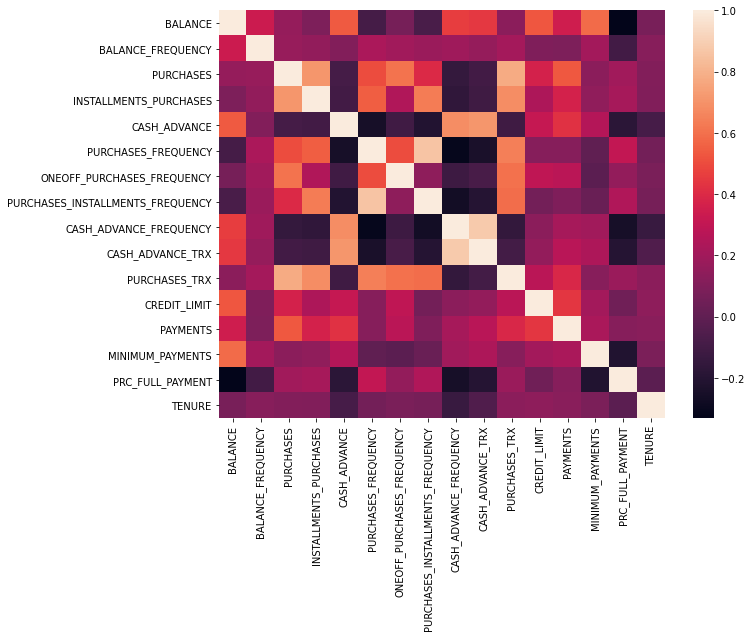

In [21]:
sns.heatmap(df.corr())

In [22]:
sc=StandardScaler()
df_scaled=sc.fit_transform(df)

In [24]:
pd.DataFrame(df_scaled).shape

(8950, 16)

In [25]:
pc=PCA(n_components =16)

In [26]:
pc.fit(df_scaled)

PCA(n_components=16)

In [27]:
pc.explained_variance_

array([4.49294562, 3.71013917, 1.31312801, 1.23637776, 0.98854472,
       0.90781906, 0.74531867, 0.64361486, 0.56588142, 0.44287711,
       0.25748003, 0.2185639 , 0.19247972, 0.14086715, 0.10475678,
       0.04099392])

In [28]:
#number of components have choosen as 6 based on cumulative variacne is explaining >75 % and individual component explaining >0.8 variance

In [29]:
pc_final=PCA(n_components=6).fit(df_scaled)

In [30]:
reduced_cr=pc_final.transform(df_scaled)

In [32]:
pd.DataFrame(reduced_cr)

,0,1,2,3,4,5
0,-1.568068,-1.590712,-0.433800,-0.499811,-0.018647,-0.176656
1,-1.710546,2.560827,0.940659,-0.657582,0.750505,-0.715697
2,0.968049,-0.212456,-0.462638,-1.437203,-2.371268,0.525640
3,-1.218497,-0.449040,0.230053,-1.585376,0.201449,0.368019
4,-1.571051,-1.152649,-0.721283,-0.687674,-0.542942,-0.209158
...,...,...,...,...,...,...
8945,0.100498,-2.140022,0.687782,3.272804,0.076013,2.325924
8946,-0.165045,-1.819638,-0.181686,3.077168,-0.096691,2.912474
8947,-0.588996,-2.103828,0.671747,2.745200,0.133976,2.809187
8948,-2.397229,-1.368608,1.332355,1.839629,-0.392644,2.904258


In [33]:
#Loadings=Eigenvectors * sqrt(Eigenvalues)

#loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [34]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=df.columns).T

In [35]:
Loadings

,0,1,2,3,4,5
BALANCE,0.067746,0.820682,-0.284807,-0.164320,0.066682,0.164694
BALANCE_FREQUENCY,0.251684,0.334632,-0.493943,0.217883,-0.466184,-0.204506
PURCHASES,0.845037,0.180218,0.160423,-0.155373,-0.062994,0.152507
INSTALLMENTS_PURCHASES,0.795767,0.081895,-0.022986,0.140477,0.315352,0.026627
CASH_ADVANCE,-0.226157,0.803566,0.231078,0.159041,0.097674,-0.088210
PURCHASES_FREQUENCY,0.819824,-0.169937,-0.120793,0.337149,-0.058394,-0.050309
ONEOFF_PURCHASES_FREQUENCY,0.625883,0.089332,0.185173,-0.212179,-0.618666,0.134888
PURCHASES_INSTALLMENTS_FREQUENCY,0.732359,-0.160176,-0.212502,0.461444,0.263824,-0.119918
CASH_ADVANCE_FREQUENCY,-0.334357,0.767761,0.136848,0.351685,-0.135457,-0.111547
CASH_ADVANCE_TRX,-0.262300,0.780908,0.164355,0.344520,-0.077247,-0.190759


In [36]:
#selected the list variables from PCA based on factor loading matrics
list_var = ['PURCHASES_TRX','INSTALLMENTS_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY','MINIMUM_PAYMENTS','BALANCE',
            'CREDIT_LIMIT','CASH_ADVANCE','PRC_FULL_PAYMENT','ONEOFF_PURCHASES_FREQUENCY']

In [38]:
df_scaled1=pd.DataFrame(df_scaled, columns=df.columns)
df_scaled1.head(5)

df_scaled2=df_scaled1[list_var]
df_scaled2.head(5)

,PURCHASES_TRX,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,MINIMUM_PAYMENTS,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,PRC_FULL_PAYMENT,ONEOFF_PURCHASES_FREQUENCY
0,-0.579714,-0.427513,-0.707313,-0.486172,-0.762856,-0.978415,-0.527079,-0.525551,-0.678661
1,-0.675130,-0.568588,-0.916995,0.255009,0.844867,0.711297,3.101370,0.234227,-0.678661
2,-0.102638,-0.568588,-0.916995,-0.098610,0.485181,0.852106,-0.527079,-0.525551,2.673451
3,-0.627422,-0.568588,-0.916995,-0.348846,0.063882,0.852106,-0.411186,-0.525551,-0.399319
4,-0.627422,-0.568588,-0.916995,-0.402520,-0.367830,-0.922091,-0.527079,-0.525551,-0.399319


In [39]:
km_3=KMeans(n_clusters=3,random_state=123)
km_3.fit(df_scaled2)

KMeans(n_clusters=3, random_state=123)

In [40]:
metrics.silhouette_score(df_scaled2, km_3.labels_)

0.3326544357376077

In [41]:
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(df_scaled2)

KMeans(n_clusters=4, random_state=123)

In [42]:
metrics.silhouette_score(df_scaled2, km_4.labels_)

0.2558368980700184

In [43]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5.fit(df_scaled2)

KMeans(n_clusters=5, random_state=123)

In [44]:
metrics.silhouette_score(df_scaled2, km_5.labels_)

0.2614624942201507

In [45]:
df['cluster_3'] = km_3.labels_
df['cluster_4'] = km_4.labels_
df['cluster_5'] = km_5.labels_

In [46]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12,1,1,0
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,2,2,4
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12,1,1,0
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,312.343947,0.000000,12,1,1,0
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,325.594462,48.886365,0.500000,6,1,3,3
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,275.861322,312.343947,0.000000,6,1,3,3
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5.0,1000.0,81.270775,82.418369,0.250000,6,1,3,3
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0.0,500.0,52.549959,55.755628,0.250000,6,1,1,0


In [48]:
size=pd.concat([pd.Series(df.cluster_3.size), pd.Series.sort_index(df.cluster_3.value_counts()), pd.Series.sort_index(df.cluster_4.value_counts()),
           pd.Series.sort_index(df.cluster_5.value_counts())])

In [49]:
size

0    8950
0    1541
1    6143
2    1266
0     989
1    4303
2    1106
3    2552
0    4070
1    1117
2     651
3    2041
4    1071
dtype: int64

In [51]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/df.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,2,3,4
Seg_size,8950,1541,6143,1266,989,4303,1106,2552,4070,1117,651,2041,1071


In [52]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,2,3,4
Seg_Pct,1.0,0.172179,0.686369,0.141453,0.110503,0.480782,0.123575,0.28514,0.454749,0.124804,0.072737,0.228045,0.119665


In [53]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)


,0,0,1,2,0,1,2,3,0,1,2,3,4
Seg_size,8950.0,1541.000000,6143.000000,1266.000000,989.000000,4303.000000,1106.000000,2552.00000,4070.000000,1117.000000,651.000000,2041.000000,1071.000000
Seg_Pct,1.0,0.172179,0.686369,0.141453,0.110503,0.480782,0.123575,0.28514,0.454749,0.124804,0.072737,0.228045,0.119665


In [54]:
Profling_output = pd.concat([df.apply(lambda x: x.mean()).T, df.groupby('cluster_3').apply(lambda x: x.mean()).T, df.groupby('cluster_4').apply(lambda x: x.mean()).T,
          df.groupby('cluster_5').apply(lambda x: x.mean()).T], axis=1)

In [55]:

Profling_output

,0,0,1,2,0,1,2,3,0,1,2,3,4
BALANCE,1541.046707,1655.084754,820.663980,4897.743752,2413.641783,1073.882786,5042.837548,472.954680,1078.123025,122.084535,3096.077866,892.780928,5070.332702
BALANCE_FREQUENCY,0.878083,0.975880,0.835077,0.967724,0.985301,0.838765,0.968624,0.863589,0.832381,0.825121,0.989044,0.915281,0.968663
PURCHASES,936.229237,3124.913082,448.384029,639.287141,3942.220222,363.299837,573.241257,894.636301,328.782990,1213.695506,4593.756989,1016.714037,578.672148
INSTALLMENTS_PURCHASES,384.498368,1350.310125,179.472176,203.740058,1549.465464,57.370033,188.454784,569.570851,42.023236,537.938542,1941.071710,598.657433,171.662904
CASH_ADVANCE,935.920972,363.335053,490.096776,3796.152361,566.820617,682.354035,4023.434786,168.424305,695.688013,85.854397,714.644800,291.186264,4098.597758
PURCHASES_FREQUENCY,0.490351,0.954980,0.411522,0.307294,0.963149,0.227110,0.302737,0.832290,0.199173,0.759118,0.970220,0.873556,0.294610
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.554779,0.128220,0.133829,0.680577,0.149241,0.124296,0.140772,0.137086,0.280429,0.656717,0.182974,0.130575
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.803672,0.287589,0.202683,0.811016,0.083171,0.201174,0.736379,0.062510,0.556687,0.878009,0.790340,0.187500
CASH_ADVANCE_FREQUENCY,0.134017,0.060960,0.106583,0.356059,0.085356,0.142614,0.365213,0.038181,0.144767,0.014124,0.098526,0.066574,0.368303
CASH_ADVANCE_TRX,3.079330,1.401687,2.178577,9.492101,2.110212,2.914711,9.867089,0.790752,2.968305,0.309758,2.528418,1.352768,10.014939


In [56]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [57]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,2,3,4
Seg_size,8950.000000,1541.000000,6143.000000,1266.000000,989.000000,4303.000000,1106.000000,2552.000000,4070.000000,1117.000000,651.000000,2041.000000,1071.000000
Seg_Pct,1.000000,0.172179,0.686369,0.141453,0.110503,0.480782,0.123575,0.285140,0.454749,0.124804,0.072737,0.228045,0.119665
BALANCE,1541.046707,1655.084754,820.663980,4897.743752,2413.641783,1073.882786,5042.837548,472.954680,1078.123025,122.084535,3096.077866,892.780928,5070.332702
BALANCE_FREQUENCY,0.878083,0.975880,0.835077,0.967724,0.985301,0.838765,0.968624,0.863589,0.832381,0.825121,0.989044,0.915281,0.968663
PURCHASES,936.229237,3124.913082,448.384029,639.287141,3942.220222,363.299837,573.241257,894.636301,328.782990,1213.695506,4593.756989,1016.714037,578.672148
INSTALLMENTS_PURCHASES,384.498368,1350.310125,179.472176,203.740058,1549.465464,57.370033,188.454784,569.570851,42.023236,537.938542,1941.071710,598.657433,171.662904
CASH_ADVANCE,935.920972,363.335053,490.096776,3796.152361,566.820617,682.354035,4023.434786,168.424305,695.688013,85.854397,714.644800,291.186264,4098.597758
PURCHASES_FREQUENCY,0.490351,0.954980,0.411522,0.307294,0.963149,0.227110,0.302737,0.832290,0.199173,0.759118,0.970220,0.873556,0.294610
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.554779,0.128220,0.133829,0.680577,0.149241,0.124296,0.140772,0.137086,0.280429,0.656717,0.182974,0.130575
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.803672,0.287589,0.202683,0.811016,0.083171,0.201174,0.736379,0.062510,0.556687,0.878009,0.790340,0.187500


In [58]:
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5']

In [60]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5
Seg_size,8950.000000,1541.000000,6143.000000,1266.000000,989.000000,4303.000000,1106.000000,2552.000000,4070.000000,1117.000000,651.000000,2041.000000,1071.000000
Seg_Pct,1.000000,0.172179,0.686369,0.141453,0.110503,0.480782,0.123575,0.285140,0.454749,0.124804,0.072737,0.228045,0.119665
BALANCE,1541.046707,1655.084754,820.663980,4897.743752,2413.641783,1073.882786,5042.837548,472.954680,1078.123025,122.084535,3096.077866,892.780928,5070.332702
BALANCE_FREQUENCY,0.878083,0.975880,0.835077,0.967724,0.985301,0.838765,0.968624,0.863589,0.832381,0.825121,0.989044,0.915281,0.968663
PURCHASES,936.229237,3124.913082,448.384029,639.287141,3942.220222,363.299837,573.241257,894.636301,328.782990,1213.695506,4593.756989,1016.714037,578.672148
INSTALLMENTS_PURCHASES,384.498368,1350.310125,179.472176,203.740058,1549.465464,57.370033,188.454784,569.570851,42.023236,537.938542,1941.071710,598.657433,171.662904
CASH_ADVANCE,935.920972,363.335053,490.096776,3796.152361,566.820617,682.354035,4023.434786,168.424305,695.688013,85.854397,714.644800,291.186264,4098.597758
PURCHASES_FREQUENCY,0.490351,0.954980,0.411522,0.307294,0.963149,0.227110,0.302737,0.832290,0.199173,0.759118,0.970220,0.873556,0.294610
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.554779,0.128220,0.133829,0.680577,0.149241,0.124296,0.140772,0.137086,0.280429,0.656717,0.182974,0.130575
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.803672,0.287589,0.202683,0.811016,0.083171,0.201174,0.736379,0.062510,0.556687,0.878009,0.790340,0.187500
